#2. Making Senses of Data with the *k*-Means Clustering Algorithm

In the second exercise, we will perform data clustering using the *k*-Means algorithm.







Before starting any task, execute the following import statements to load the necessary libraries. First, the library named **numpy** provides support for handling matrices and multi-dimensional arrays efficiently. It is often used with the alias `np` (aliases can be specified using `as`). The **operator** library supports using common operators as functions. Third, **matplotlib** offers various functionalities to draw line plots, scatter plots, histograms, and more. It is commonly used with the alias `plt`. Finally, the **random** library is used for generating random values and is often used with the alias `rd`.







In [ ]:
import numpy as np
import operator
import matplotlib.pyplot as plt
import random as rd

Next, define and execute the following function to generate a random dataset. The function `generate_random_data(N)` generates `N` random 2-dimensional data points.






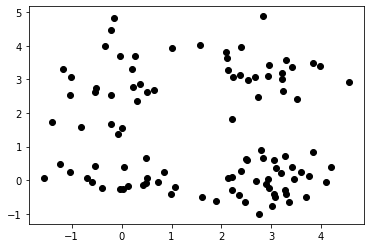

In [ ]:
# Function: generate_random_data()
def generate_random_data(N=100):
    """
    Generate a random dataset (multivariate normal)
    Input: N - number of instances to create
    Output: X - generated (synthetic) dataset
    """

    means = [[0, 0], [3, 3], [0, 3], [3, 0]]
    covs = [[[0.5, 0], [0, 0.1]], [[0.5, 0], [0, 0.5]],
            [[0.5, 0], [0, 1.0]], [[0.3, 0], [0, 0.3]]]

    X = np.zeros((N, 2))
    for n in range(N):
        seed = rd.randint(0, 3)
        X[n] = np.random.multivariate_normal(means[seed], covs[seed])

    return X

# Using the default argument (N=100), execute the function and create the data variable X
X = generate_random_data()

# Visualize the generated data using a scatter plot
plt.scatter(X[:,0], X[:,1], c='k')


##2.1. Defining a distance metric

As the first significant step in data clustering, we prepare a distance metric function. Here, we implement the commonly used Euclidean distance. Although the provided function may appear lengthy due to several lines of comments, it is a simple function consisting of a single `return` statement.

In [ ]:
def euclidean_distance(a, b):
    """
    Takes two vectors and returns the Euclidean distance between them
    Input: a - input vector a
           b - input vector b
    Output: the Euclidean distance between vectors a and b
    """
    return np.sqrt(np.sum((a-b)**2))

##2.2. *k*-Means Clustering Algorithm

Now let us implement the *k*-Means algorithm. We will take a close look at how the iterative procedure of *k*-means clustering, which we discussed during the class. The arguments used are as follows:
* `X`: The data matrix.
* `K`: The desired number of clusters.
* `max_iter`: The maximum number of iterations for the algorithm.
* `tol`: The threshold (tolerance) that determines whether the algorithm should continue its execution.
* `distance_metric`: Specifies the function for measuring the distance between data points. By default, the previously defined euclidean_distance function is used for the distance_metric.

In [ ]:
def kmeans(X, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance):
    """
    K-Means clustering algorithm.
    Input: X - input data matrix
           K - number of clusters set by the user
           max_iter - maximum number of iteration
           tol - minimum improvement (in terms of SSE) between consecutive iterations
           distance_metric - function for distance metric
    Output: c - cluster assignments
            centroids - cluster centroids
            log_centroids - history (log) of the centroids
            log_c - history (log) of the cluster assignments
            log_sse - history (log) of the SSE (sum of squared errors)
    """

    N, d = X.shape

    centroids = np.zeros((K, d))

    sse = np.Inf    # sum of squared error (objective)

    # for bookkeeping
    log_sse = []
    log_c = []
    log_centroids = []

    # initialization
    for k in range(K):
        rand_index = rd.randint(0, N-1)
        centroids[k] = X[rand_index]
#     log_centroids.append(centroids)

    # main process
    for i in range(max_iter):

        # update the cluster membership
        c = []
        for n in range(N):
            dist_to_centroids = []

            for k in range(K):
                dist_to_centroids.append(distance_metric(X[n], centroids[k]))

            c.append(np.argmin(dist_to_centroids)) # cluster membership
        log_c.append(c)

        # update the centroids
        prev_centroids = centroids  # bookkeeping
        centroids = np.zeros((K, d))
        for k in range(K):
            tmp_sum = np.zeros(d)
            tmp_count = 0
            for n in range(N):
                if c[n] == k:
                    tmp_sum += X[n]
                    tmp_count += 1
            centroids[k] = tmp_sum / tmp_count
        log_centroids.append(centroids)

        # estimate the sum of the squared errors (sse)
        prev_sse = sse  # bookkeeping
        sse = 0
        for n in range(N):
            sse += distance_metric(X[n], centroids[c[n]]) ** 2
        log_sse.append(sse)

        # stopping criterion
        if prev_sse - sse < tol:
            break

    return c, centroids, log_centroids, log_c, log_sse


Now, let us perform clustering using the code we have written. The following code finds `k=4` data clusters and visualizes the results using a scatter plot.

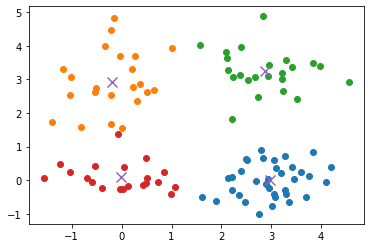

In [ ]:
# execute the clustering algorithm (k = 4)
clusters, centroids, _, _, _ = kmeans(X, 4)

# visualize the result
for k in range(4):
    mask = np.equal(clusters, k)
    plt.scatter(X[mask,0], X[mask,1])
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s = 100)

Among the outputs of the *k*-means algorithm, there is a variable called `log_sse`. This is a list that records the **sum of squared errors (SSE)** measured at each iteration during the clustering process. By examining the last element of `log_sse`, you can confirm the final SSE of the generated clusters.


In [ ]:
# log_sse[-1] = the last element of `log_sse`
clusters, centroids, _, _, log_sse = kmeans(X, 4);
print(log_sse[-1])


154.9014641609079


By varying the value of `k` in the *k*-Means algorithm and comparing the final SSE values, we can estimate the most suitable `k` value for clustering (this approach is called *elbow method*).

[  0.           0.         310.24828943 158.82081377  79.71662048
  71.48566901  62.66416463  53.57289937]


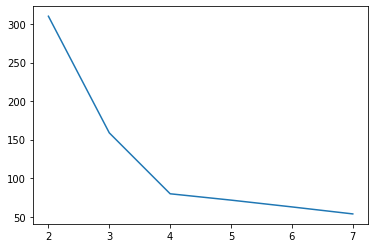

In [ ]:
list_sse = np.zeros(8)
for k in range(2,8):
  clusters, centroids, _, _, log_sse = kmeans(X, k);
  list_sse[k] = log_sse[-1]

print(list_sse)
plt.plot(range(2,8), list_sse[2:8])

##2.3. Application to a real dataset

Now, let us apply the clustering algorithm to a real dataset, instead of using randomly generated data. First, we need to mount Google Drive to access the data file. We will use the following file:
* Mall_Customers.csv

All the exercise code assumes that the data files are located under `datasets/DSCC/` in each individual's Google Drive. Open the link below to copy the data file to your personal Google Drive:
* Data file link: https://github.com/charmgil/DSCC2023

Once the file is copied, execute the following two lines of code. Then, log in with your Google account using the link that appears. Enter the authorization code shown on the screen in the blank space to connect your personal Drive with Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


이제 다음의 코드를 실행시켜봅니니다. 이때 file locator는 여러분의 Google Drive 상에서 Mall_Customers.csv 파일의 위치가 되도록해야 합니다.

In [ ]:
my_data = np.genfromtxt('drive/MyDrive/datasets/DSCC/Mall_Customers.csv', delimiter=',', skip_header=1)
# print(my_data)
N, d = my_data.shape
print(N)
print(d)

from scipy import stats
stats.describe(my_data)

200
4


DescribeResult(nobs=200, minmax=(array([ 0., 18., 15.,  1.]), array([  1.,  70., 137.,  99.])), mean=array([ 0.56, 38.85, 60.56, 50.2 ]), variance=array([2.47638191e-01, 1.95133166e+02, 6.89835578e+02, 6.66854271e+02]), skewness=array([-0.24174689,  0.48191947,  0.31942368, -0.04686531]), kurtosis=array([-1.94155844, -0.68475139, -0.12589283, -0.83595827]))

###Data normalization

Before providing data to the *k*-means clustering algorithm, it is essential to go through the normalization process. Below, we have written a simple normalization function and will use it to perform data normalization.

In [ ]:
def normalize(X):
  return (X - X.mean(axis=0)) / X.std(axis=0)

X = normalize(my_data)

###Clustering
Let us finally perform data clustering using the *k*-means algorithm. In the following code, we will use `k=5`.

In [ ]:
clusters, centroids, _, _, log_sse = kmeans(X, 5)
print(clusters)

[1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 2, 1, 4, 1, 0, 1, 1, 1, 2, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 1, 1, 4, 0, 1, 2, 4, 2, 4, 2, 1, 2, 2, 0, 4, 4, 2, 0, 4, 4, 0, 1, 2, 4, 4, 4, 2, 0, 4, 0, 1, 4, 2, 0, 2, 4, 1, 2, 4, 1, 1, 4, 4, 0, 2, 4, 4, 0, 4, 1, 2, 0, 1, 4, 2, 0, 2, 1, 4, 2, 2, 2, 2, 1, 4, 0, 1, 1, 4, 4, 4, 4, 0, 4, 4, 3, 4, 3, 0, 3, 2, 3, 2, 3, 4, 3, 0, 3, 4, 3, 0, 3, 4, 3, 4, 3, 0, 3, 2, 3, 4, 3, 0, 3, 4, 3, 4, 3, 0, 3, 0, 3, 4, 3, 0, 3, 2, 3, 0, 3, 4, 3, 0, 3, 0, 3, 4, 3, 2, 3, 2, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 0, 3]


<hr/>

## Assignment

1. Find and report the optimal value of *k* for the `Mall Customers` dataset, using the Elbow method.
2. The first line of `Mall_Customers.csv` shows the column names. Using the next function named `cluster_stats()` take a statistical summary for each cluster and conduct a simple analysis on the clusters. Draw a short conclusion based on what you observed.


In [ ]:
def cluster_stats(k, data, clusters):
  np.mean(data[np.array(clusters) == k, 1])
  print('#Male=%d, #Female=%d' % (np.sum(data[np.array(clusters) == k, 0] == 0),
                                  np.sum(data[np.array(clusters) == k, 0] == 1)))
  print('Avg. Age: %.2f +/- %.2f' % (np.mean(data[np.array(clusters) == k, 1]),
                                    np.std(data[np.array(clusters) == k, 1])))
  print('Avg. Annual Income (k$): %.2f +/- %.2f'
        % (np.mean(data[np.array(clusters) == k, 2]),
          np.std(data[np.array(clusters) == k, 2])))
  print('Avg. Spending Score (1-100): %.2f +/- %.2f'
        % (np.mean(data[np.array(clusters) == k, 3]),
          np.std(data[np.array(clusters) == k, 3])))


In [ ]:
# example run
cluster_stats(0, my_data, clusters)